The simplest possible, non-trivial, mulitivariate gradient descent.

Fitting a line with equation $y = mx + k$ to three points at locations $\{(1,2),(3,2),(3,4)\}$.

Minimising the sum of squared residuals by starting with a guess, $m = 0$ and $k = 0$, and using gradient descent to iteratively approximate the optimal values of $m^{*} = 0.5$ and $k^{*} = 1.5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#choose 3 points (observed data)

a = (1,2)
b = (3,2)
c = (3,4)

In [3]:
#create an array containing these points

M = np.array([a,b,c])

#equation of the line of best fit through the points is:
#predicted_y = m * observed_x + k

In [5]:
#calculate the sum of squared residuals

#sum of squared residuals = 
#(observed_y_a - predicted_y_a)^2 + 
#(observed_y_b - predicted_y_b)^2 + 
#(observed_y_c - predicted_y_c)^2

#sum of squared residuals in terms of observed values = 
#(observed_y_a - (m * observed_x_a + k))^2 +
#(observed_y_b - (m * observed_x_b + k))^2 +
#(observed_y_c - (m * observed_x_c + k))^2

def SSR(M, slope_intercept):    
    squared_residuals = []

    for i in range(M.shape[0]):
        observed_x = M[i,0] 
        observed_y = M[i,1]
        squared_residual = (observed_y - (slope_intercept[0]*observed_x + slope_intercept[1]))**2
        squared_residuals.append(squared_residual)

    sum_of_squared_residuals = sum(squared_residuals)
    return sum_of_squared_residuals

In [6]:
#derivative of sum of squared residuals wrt m

#dSSR_dm = 
#-2 * observed_x_a(observed_y_a - (m * observed_x_a + k)) +
#-2 * observed_x_b(observed_y_b - (m * observed_x_b + k)) +
#-2 * observed_x_c(observed_y_c - (m * observed_x_c + k)) +

def dSSR_dm(M, slope_intercept):    
    dSquared_Residuals_dm = []
    
    for i in range(M.shape[0]):
        observed_x = M[i,0]
        observed_y = M[i,1]
        dSquared_Residual_dm = -2*observed_x * (observed_y - (slope_intercept[0]*observed_x + slope_intercept[1]))
        dSquared_Residuals_dm.append(dSquared_Residual_dm)
    
    sum_of_dSquared_Residuals_dm = sum(dSquared_Residuals_dm)
    return sum_of_dSquared_Residuals_dm

In [7]:
#derivative of sum of squared residuals wrt k

#dSSR_dk =
#-2 * (observed_y_a - (m * observed_x_a + k)) +
#-2 * (observed_y_b - (m * observed_x_b + k)) +
#-2 * (observed_y_c - (m * observed_x_c + k)) +

def dSSR_dk(M, slope_intercept):    
    dSquared_Residuals_dk = []

    for i in range(M.shape[0]):
        observed_x = M[i,0]
        observed_y = M[i,1]
        dSquared_Residual_dk = -2*(observed_y - (slope_intercept[0]*observed_x + slope_intercept[1]))
        dSquared_Residuals_dk.append(dSquared_Residual_dk)
    
    sum_of_dSquared_Residuals_dk = sum(dSquared_Residuals_dk)
    return sum_of_dSquared_Residuals_dk

In [8]:
#find the direction of steepest descent of the gradient vector of the sum of squared residuals
#let f(x,y) be a multivariate function. Then, the direction of steepest descent of f at (x,y) is -grad_f(x,y)

def steepestDescentVector(sum_of_dSquared_Residuals_dm,sum_of_dSquared_Residuals_dk):
    
    #gradient vector of the sum of squared residuals
    grad_SSR = np.array([sum_of_dSquared_Residuals_dm, sum_of_dSquared_Residuals_dk])
    
    #find the direction of steepest descent of the gradient vector of the sum of squared residuals
    steepest_descent_vector = -grad_SSR

    return steepest_descent_vector

In [9]:
#update the values of the slope and intercept

def stepVector(steepest_descent_vector,learning_rate, slope_intercept):

    #normalise steepest descent vector
    magnitude_of_steepest_descent_vector = np.sqrt(steepest_descent_vector[0]**2 + steepest_descent_vector[1]**2)
    normalised_steepest_descent_vector = steepest_descent_vector/magnitude_of_steepest_descent_vector

    #increment slope and intercept by learning rate
    step_vector = normalised_steepest_descent_vector*learning_rate

    #print(slope_intercept, steepest_descent_vector)
    slope_intercept = slope_intercept + step_vector
    
    return slope_intercept, magnitude_of_steepest_descent_vector

In [67]:
#run the algorithm
num_steps = 10000

# Create arrays to store the progress of the method (for later plotting)
slope_intercepts = np.empty(shape=(num_steps,2),dtype=float)
SSRs = np.empty(shape=(num_steps,1),dtype=float)
magnitudes_of_steepest_descent_vectors = np.empty(shape=(num_steps,1),dtype=float)

# initial guess (slope_intercept contains m and k)
slope_intercept = (0,0)

for i in range(num_steps):

    # compute residuals and gradient
    sum_of_squared_residuals = SSR(M, slope_intercept)
    sum_of_dSquared_Residuals_dm = dSSR_dm(M, slope_intercept)
    sum_of_dSquared_Residuals_dk = dSSR_dk(M, slope_intercept)

    # get steepest descent vector and step along it
    steepest_descent_vector = steepestDescentVector(sum_of_dSquared_Residuals_dm, sum_of_dSquared_Residuals_dk)
    slope_intercept, magnitude_of_steepest_descent_vector = stepVector(steepest_descent_vector, 0.0005, slope_intercept)

    # record progress
    SSRs[i,:] = sum_of_squared_residuals
    slope_intercepts[i,:] = slope_intercept
    magnitudes_of_steepest_descent_vectors[i,:] = magnitude_of_steepest_descent_vector

    # print progress every 1000 steps
    if i % 1000 == 0:
        print(slope_intercept, sum_of_squared_residuals, magnitude_of_steepest_descent_vector)

print(f"Optimal values are m={slope_intercept[0]} and k={slope_intercept[1]}")

[0.00046424 0.0001857 ] 24 43.08131845707603
[0.46318848 0.1896002 ] 7.863248444123762 21.469893019703726
[0.88997003 0.43236901] 2.4806251194710938 0.9600928614983325
[0.72438879 0.9028006 ] 2.1507657595476837 0.47227681486582324
[0.54852545 1.37085197] 2.007090898931117 0.10242262760052491
[0.49969563 1.49988564] 2.0000006612829617 0.007564032491452259
[0.49969563 1.49988564] 2.0000006612829617 0.007564032491452259
[0.49969563 1.49988564] 2.0000006612829617 0.007564032491452259
[0.49969563 1.49988564] 2.0000006612829617 0.007564032491452259
[0.49969563 1.49988564] 2.0000006612829617 0.007564032491452259
Optimal values are m=0.5001636769264617 and k=1.5000614991689663


In [68]:
#check the m and k values by solving for the line of best fit directly 
from sklearn.linear_model import LinearRegression
X = M[:,0].reshape(-1,1)
y = M[:,1]
reg = LinearRegression().fit(X, y)
reg.coef_, reg.intercept_

(array([0.5]), 1.5)

Text(0.5, 1.0, 'Contour plot for the sum of squared residuals')

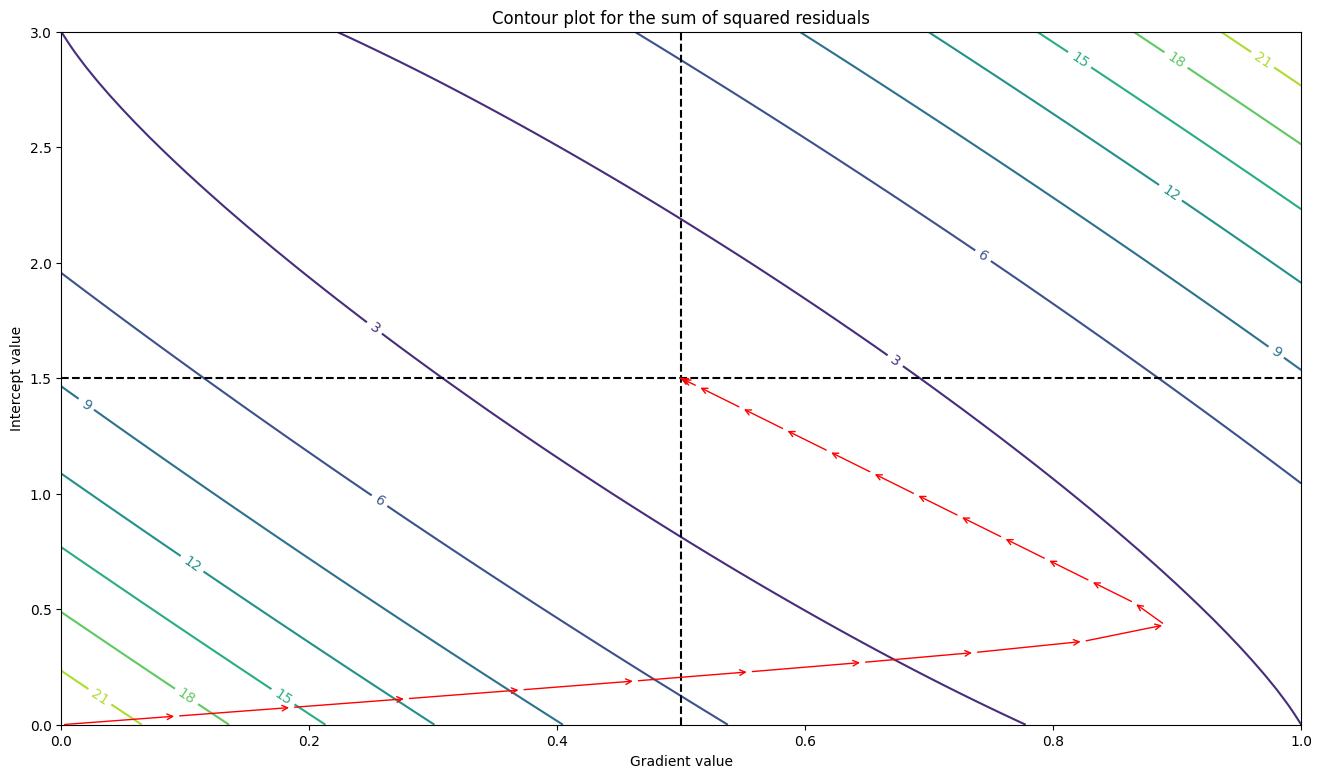

In [70]:
# A labeled contour plot for the sum of squared residuals showing the progress of the
# gradient descent method as red arrows
# Following the helpful tutorial at:
# https://scipython.com/blog/visualizing-the-gradient-descent-method/
num_pts = 100
slopes_values = np.linspace(start=0,stop=1,num=num_pts)
intercepts_values = np.linspace(start=0,stop=3,num=num_pts)
[X, Y] = np.meshgrid(slopes_values, intercepts_values) 
ssr_values = np.empty(shape=(num_pts,num_pts)) 
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        ssr_values[i,j] = SSR(M, (slopes_values[i],intercepts_values[j]))

fig, ax = plt.subplots(figsize=(16,9))
contours = ax.contour(X,Y,ssr_values)
ax.clabel(contours)

# Loop over the points explored in gradient descent using jumps 
# of 50 iterations between arrows
arrow_jumps = 50
prev_j = 0
for j in range(num_steps//arrow_jumps,num_steps,num_steps//arrow_jumps):
    # Abusing annotate to draw an arrow from xytext to xy
    # This is from the previous gradient descent point (arrow_jumps ago) to the current one
    ax.annotate('', 
                xytext=(slope_intercepts[prev_j,0],slope_intercepts[prev_j,1]),
                xy=(slope_intercepts[j,0],slope_intercepts[j,1]), 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1})

    prev_j = j

# Plot a crosshair showing the true optimum
ax.hlines(y=1.5,xmin=0,xmax=1,linestyle='dashed',color='black')
ax.vlines(x=0.5,ymin=0,ymax=3,linestyle='dashed',color='black')

ax.set_xlabel('Gradient value')
ax.set_ylabel('Intercept value')
ax.set_title('Contour plot for the sum of squared residuals')



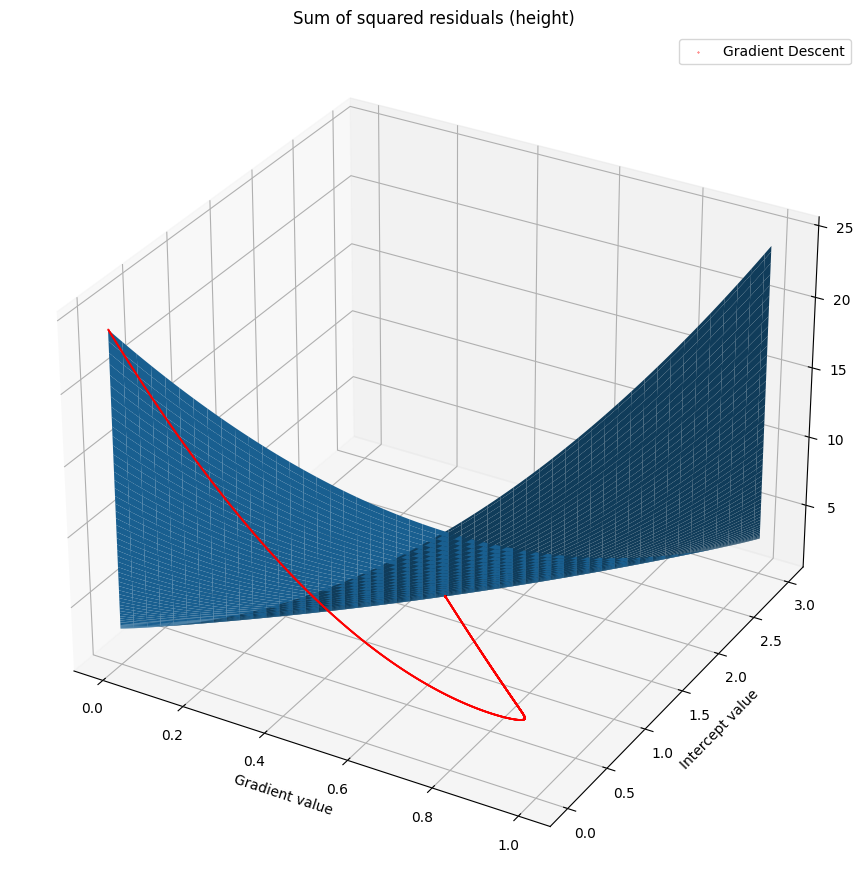

In [71]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,9))
ax.plot_surface(slopes_values,intercepts_values,ssr_values)

ax.scatter(slope_intercepts[:,0],slope_intercepts[:,1],SSRs,color='red',s=0.1,label='Gradient Descent')

ax.set_xlabel('Gradient value')
ax.set_ylabel('Intercept value')
ax.set_title('Sum of squared residuals (height)')
ax.legend()
plt.tight_layout()